## UMAP Analysis of VirProBERT
### Dataset: UniRef90

**Models**: VirProBERT, Few-Shot Classifier

**Maximum Sequence Length**: segment len 256, stride 64

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/interpretability/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/interpretability/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/interpretability/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/interpretability/../..']

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
virprobert_embedding_file_path = os.path.join(os.getcwd(), "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20241128/host_multi/mlp_embedding/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_vs30_hybd_attn_msl256s64ae_bn_cls_fnn_2l_d1024_lr1e-4_output.csv")

In [4]:
virprobert_embedding_df = pd.read_csv(virprobert_embedding_file_path, index_col=0)
virprobert_embedding_df

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,uniref90_id,y_true
0,1.858155,-0.701238,1.607671,-0.479198,-0.384463,-0.462627,-0.309630,-0.554080,-0.663522,-0.344754,...,-0.494440,-0.648949,0.767023,-0.706256,-0.547556,-0.551165,-0.385454,0.252336,['UniRef90_Q33CS1'],Human
1,-0.683813,0.251599,-0.678101,0.591359,-0.384463,1.459153,-0.534742,-0.554080,0.957640,1.579494,...,1.948836,-0.648949,-0.535414,-0.424190,0.292569,2.445096,-0.687058,-0.601948,['UniRef90_A0A060A4T8'],Human
2,0.431005,0.495820,-0.678101,0.492823,-0.384463,2.261546,-0.534742,-0.495537,-0.663522,-0.640536,...,-0.689319,-0.648949,1.825292,-0.706256,-0.560774,0.804255,-0.687058,2.828642,['UniRef90_A0A513PXW5'],Pig
3,0.224819,-0.701238,0.749788,-0.479198,-0.384463,-0.462627,-0.534742,-0.554080,-0.663522,-0.475431,...,-0.167094,-0.648949,1.077509,-0.706256,-0.560774,-0.086382,-0.687058,0.977935,['UniRef90_A0A515I595'],Human
4,0.175433,-0.701238,1.813874,-0.479198,-0.384463,-0.462627,1.071996,-0.554080,-0.663522,-0.640536,...,-0.689319,0.654037,0.746372,-0.706256,-0.560774,0.209788,0.546552,1.076375,['UniRef90_A0A1B3IMV5'],Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,-0.683813,-0.701238,-0.678101,-0.479198,-0.384463,0.541509,-0.534742,-0.554080,2.090033,0.981587,...,-0.689319,-0.648949,1.513159,-0.038131,-0.560774,1.302732,-0.551531,1.171343,['UniRef90_R9WLZ5'],Human
3165,-0.683813,-0.701238,-0.678101,-0.479198,-0.384463,-0.462627,-0.309004,0.568244,-0.663522,-0.640536,...,-0.689319,1.479376,1.606883,-0.178894,-0.560774,-0.551165,2.002587,0.682628,['UniRef90_Q9DY53'],Human
3166,0.640049,-0.179625,-0.678101,0.759868,0.179399,0.622757,-0.534742,-0.433010,-0.663522,1.198577,...,1.347635,-0.648949,-0.535414,-0.706256,-0.560774,1.203434,-0.410381,-0.601948,['UniRef90_A0A482ATZ5'],Human
3167,1.018153,-0.295874,0.922964,-0.479198,-0.384463,-0.462627,0.760054,-0.500527,-0.474482,-0.272307,...,-0.689319,0.905357,-0.284760,-0.031412,-0.056127,-0.551165,0.728248,-0.197223,['UniRef90_A0A0N9K8I4'],Human


In [5]:
label_col = "y_true"
virprobert_embedding_df[label_col].unique()

array(['Human', 'Pig', 'Red junglefowl', 'Himalayan marmot', 'Capybara'],
      dtype=object)

In [6]:
columns = list(virprobert_embedding_df.columns)
columns.remove("uniref90_id")
columns.remove(label_col)

In [7]:
len(columns)

1024

In [8]:
import umap

/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
umap_emb = umap.UMAP(n_neighbors=100, min_dist=0.0, metric="euclidean").fit_transform(virprobert_embedding_df[columns], labels=virprobert_embedding_df[label_col].values)

In [32]:
umap_emb

array([[ 3.3617518 , -0.89042336],
       [ 4.926733  ,  2.2768047 ],
       [ 5.178487  ,  0.5085359 ],
       ...,
       [ 4.8149757 ,  2.6130342 ],
       [ 1.9522854 , -2.974287  ],
       [ 3.667874  ,  2.236065  ]], dtype=float32)

In [33]:
umap_emb_df = pd.DataFrame(umap_emb, columns=["umap1", "umap2"])
umap_emb_df[label_col] = virprobert_embedding_df[label_col]
umap_emb_df

,umap1,umap2,y_true
0,3.361752,-0.890423,Human
1,4.926733,2.276805,Human
2,5.178487,0.508536,Pig
3,3.405437,-0.822039,Human
4,2.959166,-3.439624,Human
...,...,...,...
3164,2.269201,-0.223630,Human
3165,0.700439,0.775380,Human
3166,4.814976,2.613034,Human
3167,1.952285,-2.974287,Human


<Figure size 640x480 with 0 Axes>

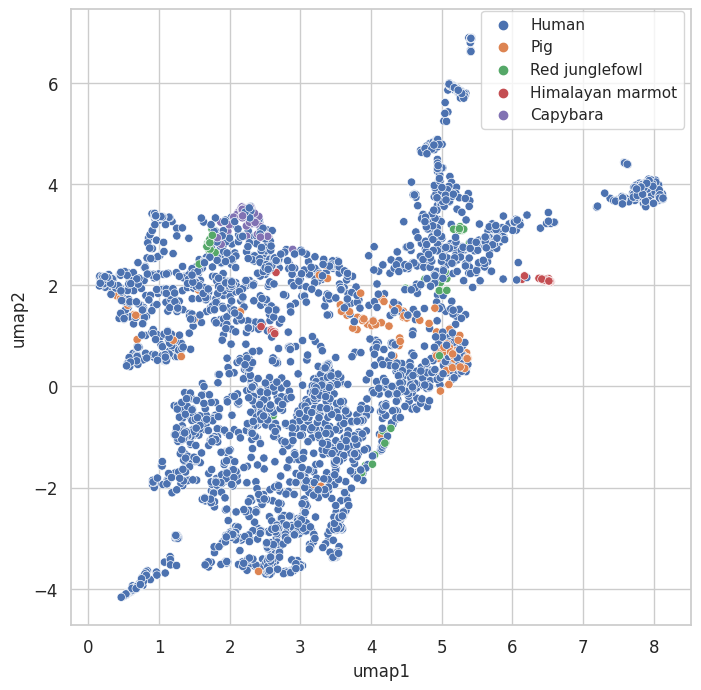

In [34]:
plt.clf()
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.set_theme(style="whitegrid")
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams.update({'font.size': 12})

sns.scatterplot(data=umap_emb_df, x="umap1", y="umap2", hue=label_col, ax=ax)
ax.legend(bbox_to_anchor=(1.00, 1.01))
